In [1]:
#Importing packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [5]:
# We gonna start by working on a single exemple and then we can loop over all the others
data_dir="csv_files_entire_data"
data_csv="2022-03-02.csv"


# 1- **Read raw data from excel file**

In [6]:
data=pd.read_csv(os.path.join(data_dir,data_csv), delimiter=';', error_bad_lines=False)
data.columns
print(data.shape)
data.head()


(2122, 23)


V-----   SWVNR=2001253        SQNDL=6  DATE=22-03-02  TIME=00:00:11  \
0    C-----           P1001            NaN            NaN            NaN   
1    V-----   SWVNR=2001253       SQNDL=11  DATE=22-03-02  TIME=00:00:16   
2   SQNR=60   DATE=22-03-02  TIME=00:01:00    STAT=200222         TMPA=6   
3  SQNR=120   DATE=22-03-02  TIME=00:02:00    STAT=200222         TMPA=6   
4  SQNR=180   DATE=22-03-02  TIME=00:03:00    STAT=200222         TMPA=6   

   THTYP=85  TTEMP=15  TDEWP=5  IUFAN=800  ILFAN=5  ...  PYAVW=1  PYOST=0  \
0       NaN       NaN      NaN        NaN      NaN  ...      NaN      NaN   
1  THTYP=85  TTEMP=15  TDEWP=5  IUFAN=800  ILFAN=5  ...  PYAVW=1  PYOST=0   
2   TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   
3   TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   
4   TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   

   MSDLY=60  FNDLY=30  OSTRG=3  DBGFL=0  ASIRE=0  DBGRE=0  MPPFL=-1  \
0       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
1  MSDLY=60  FNDLY=30  OSTRG=3  DBGFL=0  ASIRE=0  DBGRE=0  MPPFL=-1   
2       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
3       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
4       NaN       NaN      NaN      NaN      NaN      NaN       NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 23 columns]

In [7]:
data.head()

V-----   SWVNR=2001253        SQNDL=6  DATE=22-03-02  TIME=00:00:11  \
0    C-----           P1001            NaN            NaN            NaN   
1    V-----   SWVNR=2001253       SQNDL=11  DATE=22-03-02  TIME=00:00:16   
2   SQNR=60   DATE=22-03-02  TIME=00:01:00    STAT=200222         TMPA=6   
3  SQNR=120   DATE=22-03-02  TIME=00:02:00    STAT=200222         TMPA=6   
4  SQNR=180   DATE=22-03-02  TIME=00:03:00    STAT=200222         TMPA=6   

   THTYP=85  TTEMP=15  TDEWP=5  IUFAN=800  ILFAN=5  ...  PYAVW=1  PYOST=0  \
0       NaN       NaN      NaN        NaN      NaN  ...      NaN      NaN   
1  THTYP=85  TTEMP=15  TDEWP=5  IUFAN=800  ILFAN=5  ...  PYAVW=1  PYOST=0   
2   TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   
3   TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   
4   TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   

   MSDLY=60  FNDLY=30  OSTRG=3  DBGFL=0  ASIRE=0  DBGRE=0  MPPFL=-1  \
0       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
1  MSDLY=60  FNDLY=30  OSTRG=3  DBGFL=0  ASIRE=0  DBGRE=0  MPPFL=-1   
2       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
3       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
4       NaN       NaN      NaN      NaN      NaN      NaN       NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 23 columns]

### Function for removing unwanted columns

In [8]:
def deleting_columns(data):
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data

data

V-----   SWVNR=2001253        SQNDL=6  DATE=22-03-02  TIME=00:00:11  \
0       C-----           P1001            NaN            NaN            NaN   
1       V-----   SWVNR=2001253       SQNDL=11  DATE=22-03-02  TIME=00:00:16   
2      SQNR=60   DATE=22-03-02  TIME=00:01:00    STAT=200222         TMPA=6   
3     SQNR=120   DATE=22-03-02  TIME=00:02:00    STAT=200222         TMPA=6   
4     SQNR=180   DATE=22-03-02  TIME=00:03:00    STAT=200222         TMPA=6   
...        ...             ...            ...            ...            ...   
2117    SQNR=0   DATE=22-03-03  TIME=00:00:00    STAT=202222         TMPA=7   
2118    C-----         H186394            NaN            NaN            NaN   
2119    V-----   SWVNR=2001253    SQNDL=86392  DATE=22-03-03  TIME=23:59:57   
2120    C-----       U22-03-02            NaN            NaN            NaN   
2121    C-----               ?            NaN            NaN            NaN   

      THTYP=85  TTEMP=15  TDEWP=5  IUFAN=800  ILFAN=5  ...  PYAVW=1  PYOST=0  \
0          NaN       NaN      NaN        NaN      NaN  ...      NaN      NaN   
1     THTYP=85  TTEMP=15  TDEWP=5  IUFAN=800  ILFAN=5  ...  PYAVW=1  PYOST=0   
2      TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   
3      TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   
4      TMPP=63   TMPB=12  TMPC=15    RHUA=71   DWPA=1  ...      NaN      NaN   
...        ...       ...      ...        ...      ...  ...      ...      ...   
2117   TMPP=72   TMPB=13  TMPC=15    RHUA=77   DWPA=3  ...  PIRP=-7  PIRM=-7   
2118       NaN       NaN      NaN        NaN      NaN  ...      NaN      NaN   
2119  THTYP=85  TTEMP=15  TDEWP=5  IUFAN=800  ILFAN=5  ...  PYAVW=1  PYOST=0   
2120       NaN       NaN      NaN        NaN      NaN  ...      NaN      NaN   
2121       NaN       NaN      NaN        NaN      NaN  ...      NaN      NaN   

      MSDLY=60  FNDLY=30  OSTRG=3  DBGFL=0  ASIRE=0  DBGRE=0  MPPFL=-1  \
0          NaN       NaN      NaN      NaN      NaN      NaN       NaN   
1     MSDLY=60  FNDLY=30  OSTRG=3  DBGFL=0  ASIRE=0  DBGRE=0  MPPFL=-1   
2          NaN       NaN      NaN      NaN      NaN      NaN       NaN   
3          NaN       NaN      NaN      NaN      NaN      NaN       NaN   
4          NaN       NaN      NaN      NaN      NaN      NaN       NaN   
...        ...       ...      ...      ...      ...      ...       ...   
2117   PIRL=-8    PIRH=0      NaN      NaN      NaN      NaN       NaN   
2118       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
2119  MSDLY=60  FNDLY=30  OSTRG=3  DBGFL=0  ASIRE=0  DBGRE=0  MPPFL=-1   
2120       NaN       NaN      NaN      NaN      NaN      NaN       NaN   
2121       NaN       NaN      NaN      NaN      NaN      NaN       NaN   

     Unnamed: 22  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2117         NaN  
2118         NaN  
2119         NaN  
2120         NaN  
2121         NaN  

[2122 rows x 23 columns]

In [6]:
data.head()
data.columns

Index(['SQNDL=6', 'PYAVW=1'], dtype='object')

## 2- **Data Preprocessing and manipulation**

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

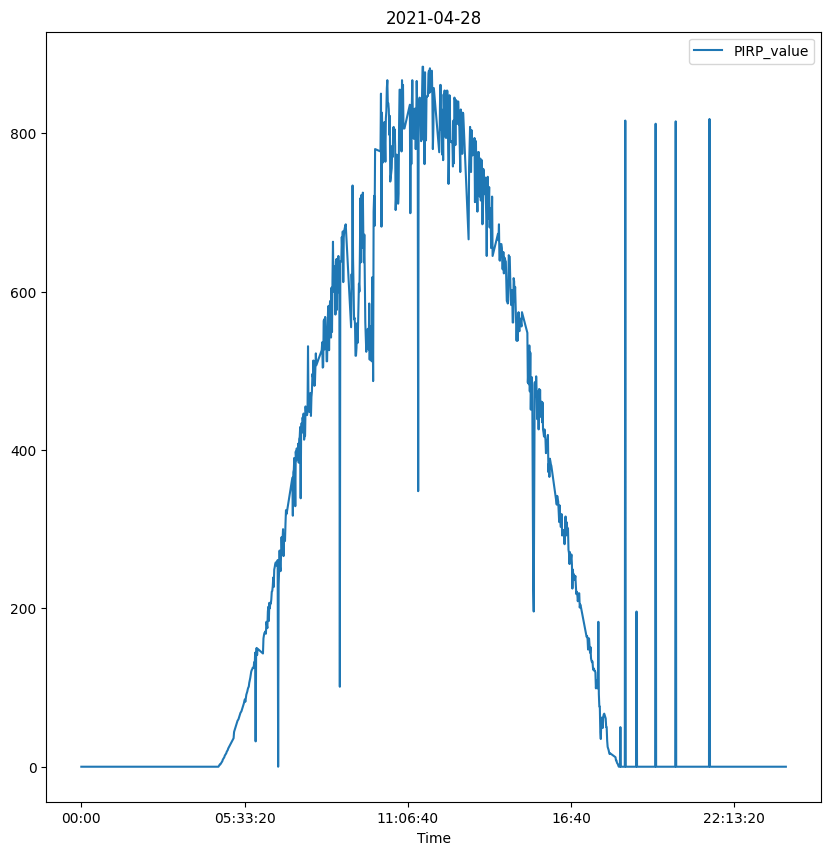

In [35]:
#Remove all lines that do not have a Time value
def time_pre(time_):
  if "TIME" in time_:
    return time_
  else:
    return np.nan
  
#Remove all lines that do not have an integer Pirp value
def pirp_present(pirp):
  if "PIRP" in pirp:
    return pirp
  else:
    return np.nan
i=0


#Using a sort of data interpolation in the case if the irradiance sensor capts and gives us outliers values
#Which are values below 0 and beyond 1000 W/m2
def reset_to_treshold(pirp):
    print("ok")
    global i
    global preceding_value
    if -200<=pirp<=0:
        #Returning 0 if the irradiance value is below between -200 and 0 because we judge that it may just be
        #an error from the sensor and the actual value is 0 (because the irradiance can't be negative)
        preceding_value=0
        return 0
    
    elif pirp<-200:
        #Returning the precedent value because in such case if like the sensor is detecting -1000 or in same cases
        #very large numbers like -10^5 W/m2, so it is probably an electrical problem on the sensor
        #so we replace the current value by the precedent one
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    elif 1000<=pirp<=1100:
        #Returning 1000 is the sensor detects a value a little bit larger than 1000
        preceding_value=1000
        return preceding_value
    
        
    elif pirp>1100:
        #Returning the precedent value
        print("here")
        #print(data["PIRP_value"].index.get_loc(pirp))
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    else:
        #return the same value if we are in any case above...
        preceding_value=pirp
        return pirp
    

def reset_to_treshold_d(row):
    
    pirp = row["PIRP_value"]
    
    if -200 <= pirp <= 0:
        preceding_value = 0
        return 0
    
    elif pirp < -200:
        #i += 1
        # Access the index of the current row
        current_index = row.name
        print("-200")
        # Access the preceding value from the previous row
        preceding_value = data.loc[current_index - 1, "PIRP_value"]
        # Access the following value from the next row
        #following_value = data.loc[current_index + 1, "PIRP_value"]
        return preceding_value
    
    elif 1000 <= pirp <= 1100:
        preceding_value = 1000
        return preceding_value
    
    elif pirp>1100:
        current_index = row.name
        print("1100")
        #print("here")
        #print(data["PIRP_value"].index.get_loc(pirp))
        #i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        preceding_value = (data.loc[current_index-1,"PIRP_value"])
        #following_value = (data.loc[current_index+1,"PIRP_value"])
        return preceding_value
    
    else:
        current_index = int(row.name)
        print("else", current_index)
        pre_preceding_value = (data.loc[current_index-2,"PIRP_value"])+1
        fol_following_value = (data.loc[current_index+2,"PIRP_value"])+1
        if pirp>=5*pre_preceding_value or pirp>=5*fol_following_value:
           preceding_value=pre_preceding_value
           pirp=pre_preceding_value
           return pirp
        preceding_value=pirp
        return pirp


def reset_to_treshold_simple(pirp):
    #A simpler version of reseting values than the twos that we have seen before
    if pirp<=0:
        return 0
    elif pirp>=1000:
        return 1000
    else:
        return pirp
    

def deleting_columns(data):
    #Deleting unwanted columns
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data
    
#Ressembling all the preprocessing and manipulation operation into one function
def preprocess_1(data):
    #Renaming columns
    data.rename(columns={data.columns[0]:"Time"},inplace=True)
    data.rename(columns={data.columns[1]:"PIRP_value"},inplace=True)

    #Droping missing values
    data.dropna(axis=0,inplace=True)
    data["Time"]=data["Time"].map(time_pre)
    data["PIRP_value"]=data["PIRP_value"].map(pirp_present)
    data.dropna(axis=0,inplace=True)

    #Removing the "Time=" and "PIRP=" from data
    data["Time"]=data["Time"].str.split("=").str[1]
    data["PIRP_value"]=data["PIRP_value"].str.split("=").str[1]

    #Making pirp values integers
    data["PIRP_value"]=data["PIRP_value"].astype(int)

    #Making Time values in datetime format
    data['Time'] = data["Time"].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').time())

    #data.set_index("Time",inplace=True)
    #data["PIRP_value"] = data["PIRP_value"].map(lambda pirp: reset_to_treshold(pirp, data, data.index.get_loc()))
    #data["PIRP_value"]=data["PIRP_value"].map(reset_to_treshold_simple)
    #data["PIRP_value"] = data["PIRP_value"].map(reset_to_treshold)

    data=data.reset_index(drop=True)


    #data["PIRP_value"] = data.apply(reset_to_treshold, axis=1)

    #Applying the reseting operation on values
    data["PIRP_value"]=data["PIRP_value"].map(reset_to_treshold)

    data.plot(x="Time",y="PIRP_value",figsize=(10,10))
    plt.title("2021-04-28")

    return data

#Apply the function to a particular exemple
data_dir="csv_files_entire_data"
data_csv="2022-04-28.csv"
data=pd.read_csv(os.path.join(data_dir,data_csv), delimiter=';', error_bad_lines=False)
data=deleting_columns(data)
data=preprocess_1(data)
print("i=",i)
print(data["PIRP_value"].count())







In [38]:
def repartir(pirp):
  if 0<=pirp<=10:
    return "class 0"
  elif pirp>10 and pirp <=100:
    return "class 1"
  elif pirp>100:
    return "class 2"
  
"""def reset_to_treshold(pirp):
    if pirp<=0:
        return 0
    elif pirp>=1000:
        return 1000
    else:
        return pirp"""

def preprocess_2(data):
   #Applyin a second preprocessing operation
   #data["PIRP_value"]=data["PIRP_value"].map(reset_to_treshold)
   data["Category"]=data["PIRP_value"].map(repartir)
   return data

data=preprocess_2(data)


**Normally, before applying the reset operations on values, i observed that we had many outliers in our data and that's due to technical problems in the sensor, that's pushes me to apply reseting operations..., So here is what it was like...**

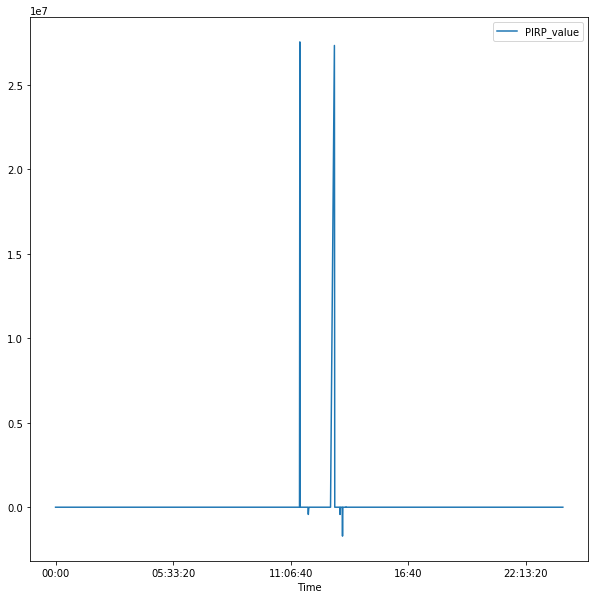

In [15]:
data.head()
data.plot(x="Time",y="PIRP_value",figsize=(10,10))
#Observing outliers in the plot which hides the relevent values in our data

In [16]:
data.to_csv("data_test.csv",sep=';',index=False)

# 2- **Preprocess all the csv files and saving them**

In [78]:
data_dir="csv_files"
#data_csv="2022-01-05.csv"
#data=pd.read_csv(os.path.join(data_dir,data_csv), delimiter=';')

def deleting_columns_upd(data):
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data

def time_pre(time_):
  if "TIME" in time_:
    return time_
  else:
    return np.nan
  
def pirp_present(pirp):
  if "PIRP" in pirp:
    return pirp
  else:
    return np.nan
  
def reset_to_treshold(pirp):
    print("ok")
    global i
    global preceding_value
    if -200<=pirp<=0:
        preceding_value=0
        return 0
    
    elif pirp<-200:
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    elif 1000<=pirp<=1100:
        preceding_value=1000
        return preceding_value
    
        
    elif pirp>1100:
        print("here")
        #print(data["PIRP_value"].index.get_loc(pirp))
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    else:
        preceding_value=pirp
        return pirp
    
def reset_to_treshold_simple(pirp):
    if pirp<=0:
        return 0
    elif pirp>=1000:
        return 1000
    else:
        return pirp
    
def deleting_columns(data):
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data
    
def preprocess_1(data):

    data.rename(columns={data.columns[0]:"Time"},inplace=True)
    data.rename(columns={data.columns[1]:"PIRP_value"},inplace=True)

    data.dropna(axis=0,inplace=True)
    data["Time"]=data["Time"].map(time_pre)
    data["PIRP_value"]=data["PIRP_value"].map(pirp_present)
    data.dropna(axis=0,inplace=True)

    data["Time"]=data["Time"].str.split("=").str[1]
    data["PIRP_value"]=data["PIRP_value"].str.split("=").str[1]

    data["PIRP_value"]=data["PIRP_value"].astype(int)

    data['Time'] = data["Time"].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').time())

    data["PIRP_value"] = data["PIRP_value"].map(reset_to_treshold)

    return data

def repartir(pirp):
  if 0<=pirp<=10:
    return "class 0"
  elif pirp>10 and pirp <=100:
    return "class 1"
  elif pirp>100:
    return "class 2"
  
def preprocess_2(data):
   
   data["Category"]=data["PIRP_value"].map(repartir)
   return data


def construct_csv_folder(data_dir):
    if os.path.exists("preprocess_csv_files_new"):
       shutil.rmtree("preprocess_csv_files_new")
    os.makedirs("preprocess_csv_files_new")

    #Looping over all the files in the database
    for csv_file in os.listdir(data_dir):
        data=pd.read_csv(os.path.join(data_dir,csv_file), delimiter=';', error_bad_lines=False)
        
        # error_bad_lines- it states that there were 23 fields in certain lines while the expected number of fields was 18.
        # When you set error_bad_lines=False, it instructs pandas to skip the lines that have errors and continue reading the rest of the file. This is why you didn't receive an error message.
        #and we don't even need those lines because they are not containing Time or pirp
        i=1
        #print(data.shape[1])
        while data.shape[1]!=23:
           data=pd.read_csv(os.path.join(data_dir,csv_file), delimiter=';', error_bad_lines=False,skiprows=i)
           i+=1
        #print(data.shape[1])
        data=deleting_columns(data)
        #print(csv_file)

        data=preprocess_1(data)
        data=preprocess_2(data)

        #Saving modified csv files
        data.to_csv(os.path.join("preprocess_csv_files_new",csv_file),sep=';',index=False)

data_dir="csv_files_entire_data"
construct_csv_folder(data_dir)
        



ok
ok
ok
here
ok
here
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
he

b'Skipping line 4: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 11: expected 18 fields, saw 23\nSkipping line 13: expected 18 fields, saw 23\nSkipping line 23: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 47: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 71: expected 18 fields, saw 23\nSkipping line 93: expected 18 fields, saw 23\nSkipping line 115: expected 18 fields, saw 23\nSkipping line 137: expected 18 fields, saw 23\nSkipping line 159: expected 18 fields, saw 23\nSkipping line 181: expected 18 fields, saw 23\nSkipping line 203: expected 18 fields, saw 23\nSkipping line 225: expected 18 fields, saw 23\nSkipping line 247: expected 18 fields, saw 23\nSkipping line 269: expected 18 fields, saw 23\nSkipping line 291: expected 18 fields, saw 23\nSkipping line 296: expected 18 fields, saw 23\nSkipping line 315: expected 18 fields, saw 23\nSkipping line 337: expe

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok


b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 19: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 91: expected 18 fields, saw 23\nSkipping line 93: expected 18 fields, saw 23\nSkipping line 100: expected 18 fields, saw 23\nSkipping line 107: expected 18 fields, saw 23\nSkipping line 109: expected 18 fields, saw 23\nSkipping line 116: expected 18 fields, saw 23\nSkipping line 123: expected 18 fields, saw 23\nSkipping line 130: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 19: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
h

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 7: expected 18 fields, saw 23\nSkipping line 9: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 18

ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 18

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
here
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 5: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 91: expected 18 fields, saw 23\nSkipping line 93: expected 18 fields, saw 23\nSkipping line 100: expected 18 fields, saw 23\nSkipping line 107: expected 18 fields, saw 23\nSkipping line 109: expected 18 fields, saw 23\nSkipping line 116: expected 18 fields, saw 23\nSkipping line 123: expected 18 fields, saw 23\nSkipping line 130: expected 18

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 18

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 2 fields, saw 23\nSkipping line 5: expected 2 fields, saw 23\nSkipping line 6: expected 2 fields, saw 18\nSkipping line 7: expected 2 fields, saw 18\nSkipping line 8: expected 2 fields, saw 18\nSkipping line 9: expected 2 fields, saw 18\nSkipping line 11: expected 2 fields, saw 18\nSkipping line 12: expected 2 fields, saw 23\nSkipping line 13: expected 2 fields, saw 18\nSkipping line 14: expected 2 fields, saw 18\nSkipping line 15: expected 2 fields, saw 18\nSkipping line 16: expected 2 fields, saw 18\nSkipping line 18: expected 2 fields, saw 18\nSkipping line 19: expected 2 fields, saw 23\nSkipping line 20: expected 2 fields, saw 18\nSkipping line 21: expected 2 fields, saw 18\nSkipping line 22: expected 2 fields, saw 18\nSkipping line 23: expected 2 fields, saw 18\nSkipping line 25: expected 2 fields, saw 18\nSkipping line 26: expected 2 fields, saw 23\nSkipping line 27: expected 2 fields, saw 18\nSkipping line 28: expected 2 fields, saw 18\nSkipping line 

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 5: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 18

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 19: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 19: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 7: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 19: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 19: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 7: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok


b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 19: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 7: expected 18 fields, saw 23\nSkipping line 12: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 11 fields, saw 23\nSkipping line 7: expected 11 fields, saw 23\nSkipping line 12: expected 11 fields, saw 23\nSkipping line 14: expected 11 fields, saw 23\nSkipping line 15: expected 11 fields, saw 18\nSkipping line 16: expected 11 fields, saw 18\nSkipping line 17: expected 11 fields, saw 18\nSkipping line 18: expected 11 fields, saw 18\nSkipping line 20: expected 11 fields, saw 18\nSkipping line 21: expected 11 fields, saw 23\nSkipping line 22: expected 11 fields, saw 18\nSkipping line 23: expected 11 fields, saw 18\nSkipping line 24: expected 11 fields, saw 18\nSkipping line 25: expected 11 fields, saw 18\nSkipping line 27: expected 11 fields, saw 18\nSkipping line 28: expected 11 fields, saw 23\nSkipping line 29: expected 11 fields, saw 18\nSkipping line 30: expected 11 fields, saw 18\nSkipping line 31: expected 11 fields, saw 18\nSkipping line 32: expected 11 fields, saw 18\nSkipping line 34: expected 11 fields, saw 18\nSkipping line 35: expected 11 fiel

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
here
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 5: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 46: expected 18 fields, saw 23\nSkipping line 50: expected 18 fields, saw 23\nSkipping line 54: expected 18 fields, saw 23\nSkipping line 61: expected 18 fields, saw 23\nSkipping line 68: expected 18 fields, saw 23\nSkipping line 75: expected 18 fields, saw 23\nSkipping line 82: expected 18 fields, saw 23\nSkipping line 89: expected 18 fields, saw 23\nSkipping line 97: expected 18 fields, saw 23\nSkipping line 99: expected 18 fields, saw 23\nSkipping line 106: expected 18 fields, saw 23\nSkipping line 113: expected 18 fields, saw 23\nSkipping line 115: expected 18 fields, saw 23\nSkipping line 122: expected 18 f

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 6: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 92: expected 18 fields, saw 23\nSkipping line 94: expected 18 fields, saw 23\nSkipping line 101: expected 18 fields, saw 23\nSkipping line 108: expected 18 fields, saw 23\nSkipping line 110: expected 18 fields, saw 23\nSkipping line 117: expected 18 fields, saw 23\nSkipping line 124: expected 18 fields, saw 23\nSkipping line 131: expected 18

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

b'Skipping line 3: expected 18 fields, saw 23\nSkipping line 5: expected 18 fields, saw 23\nSkipping line 8: expected 18 fields, saw 23\nSkipping line 14: expected 18 fields, saw 23\nSkipping line 21: expected 18 fields, saw 23\nSkipping line 28: expected 18 fields, saw 23\nSkipping line 35: expected 18 fields, saw 23\nSkipping line 42: expected 18 fields, saw 23\nSkipping line 49: expected 18 fields, saw 23\nSkipping line 56: expected 18 fields, saw 23\nSkipping line 63: expected 18 fields, saw 23\nSkipping line 70: expected 18 fields, saw 23\nSkipping line 77: expected 18 fields, saw 23\nSkipping line 84: expected 18 fields, saw 23\nSkipping line 91: expected 18 fields, saw 23\nSkipping line 93: expected 18 fields, saw 23\nSkipping line 100: expected 18 fields, saw 23\nSkipping line 107: expected 18 fields, saw 23\nSkipping line 109: expected 18 fields, saw 23\nSkipping line 116: expected 18 fields, saw 23\nSkipping line 123: expected 18 fields, saw 23\nSkipping line 130: expected 18

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

# 3- **Visualising the new evolution of irradiance for any day**

**Evolution on some Automn days**

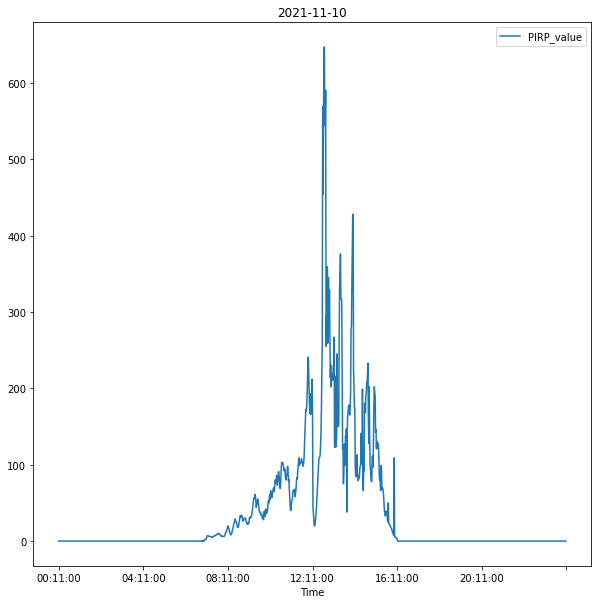

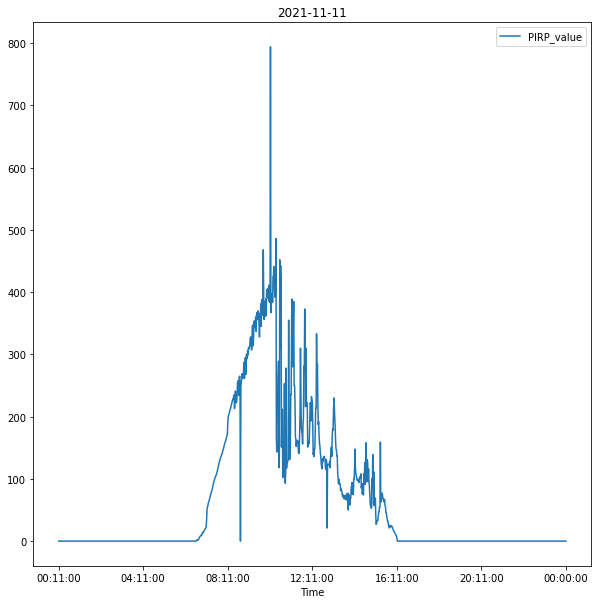

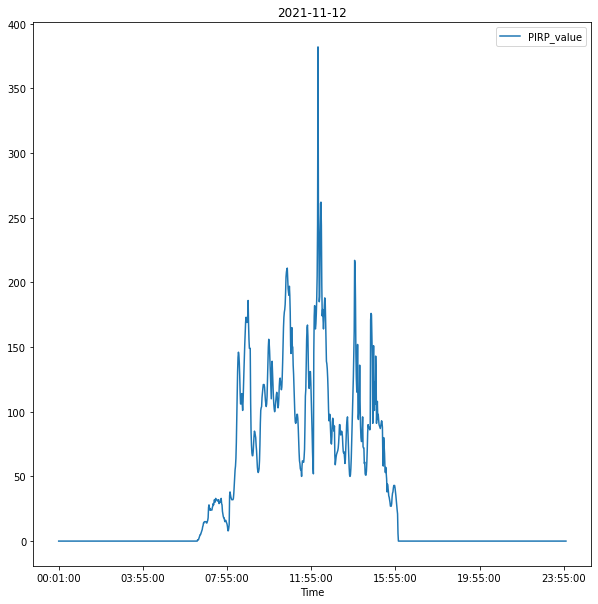

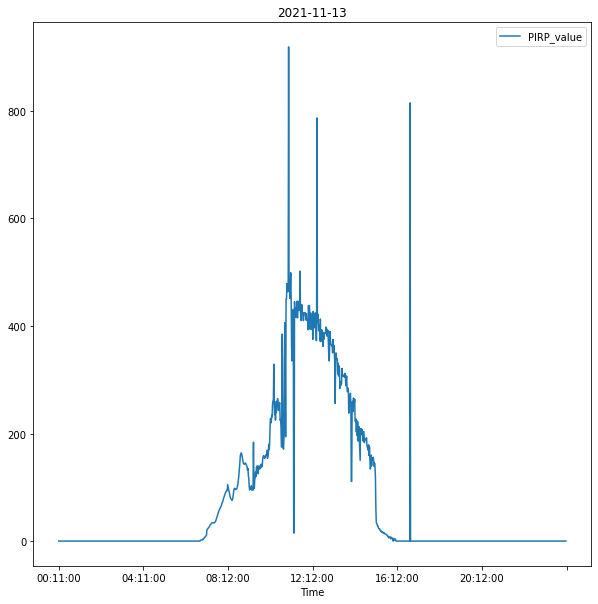

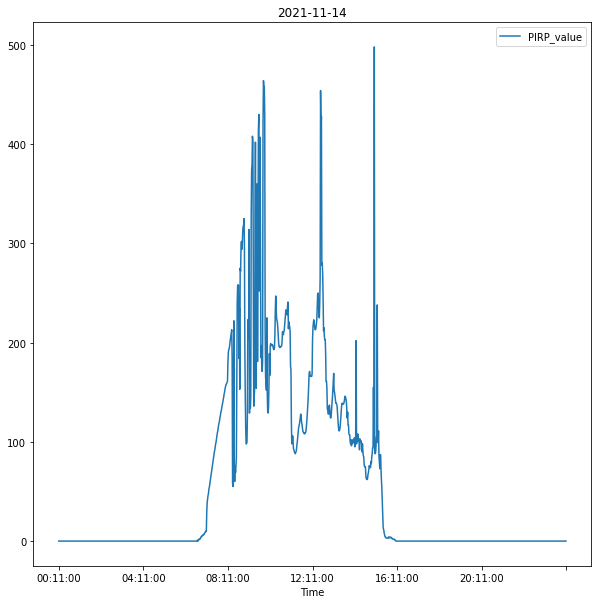

In [18]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[95:100]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


**Evolution on some Winter days**

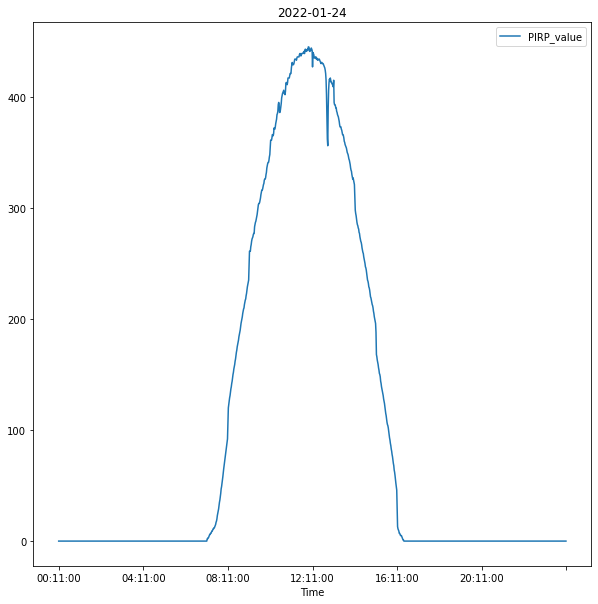

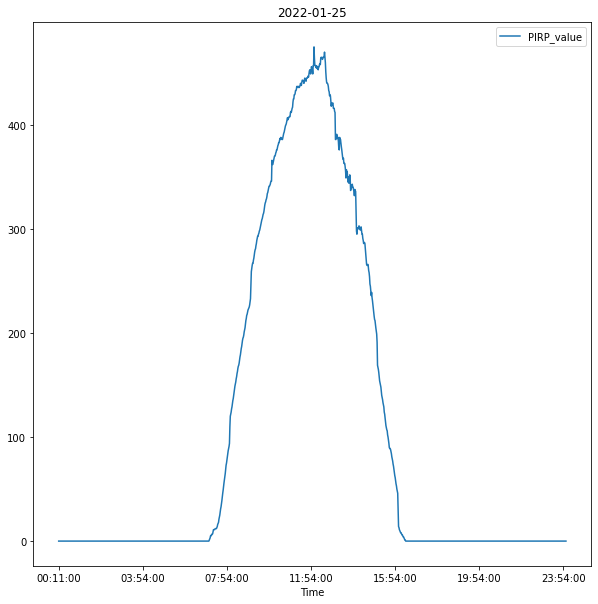

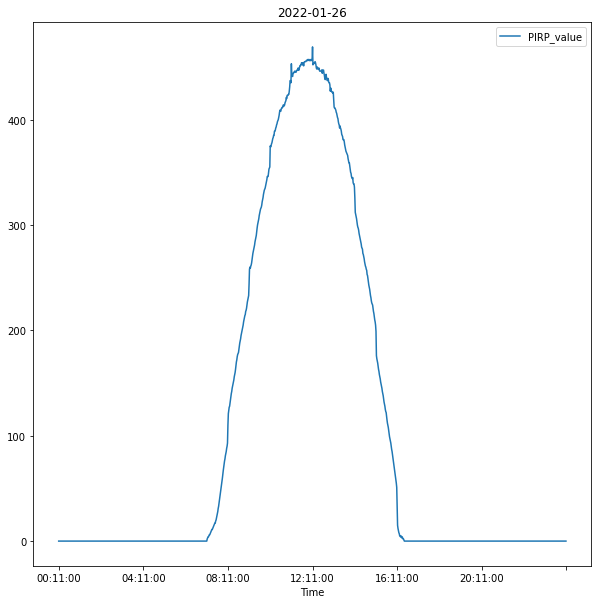

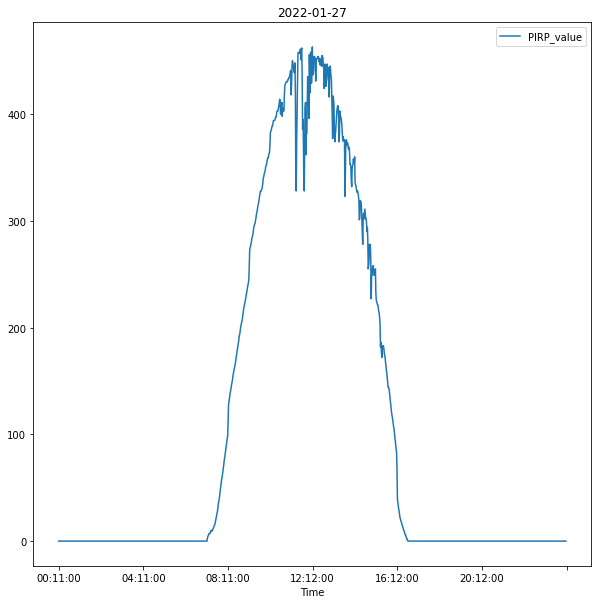

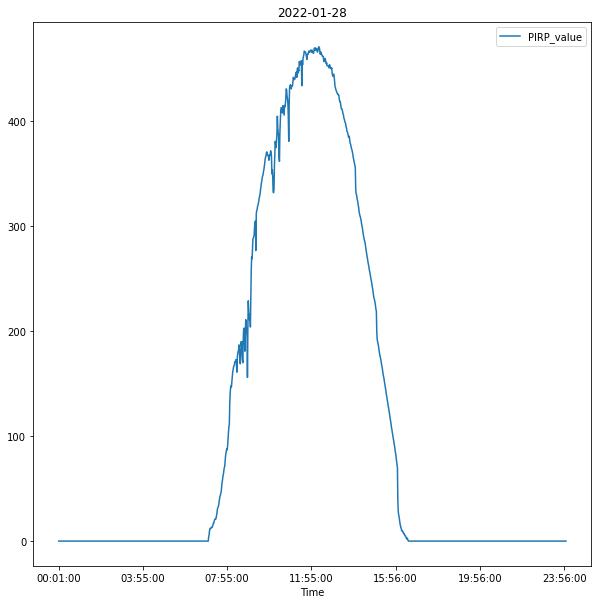

In [17]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[150:155]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


**Evolution on some spring days**


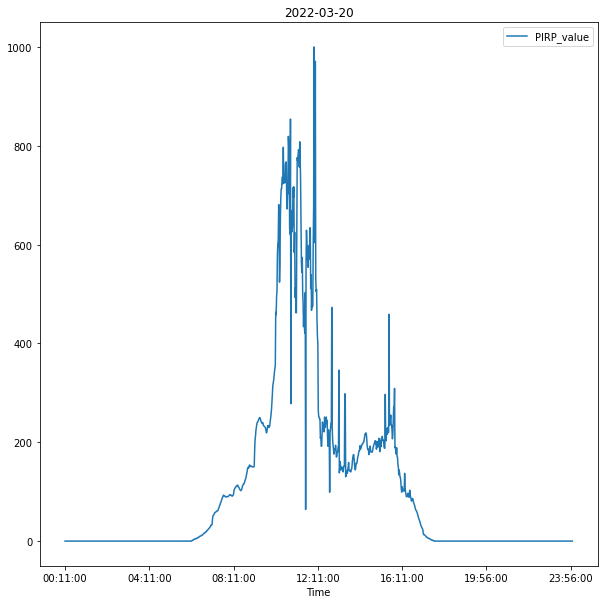

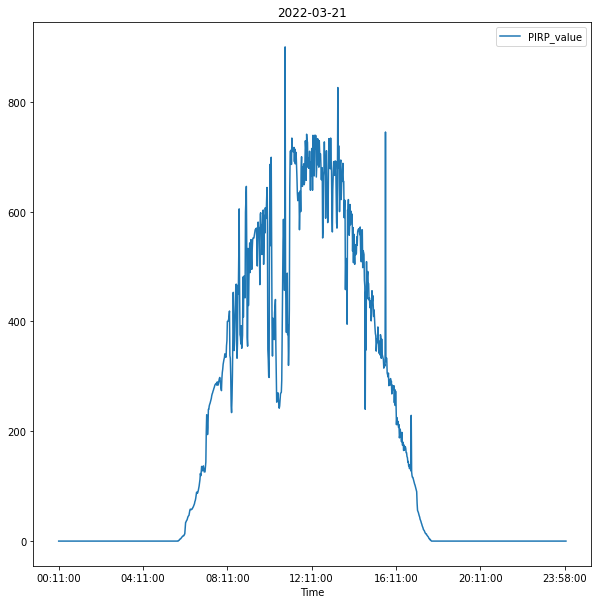

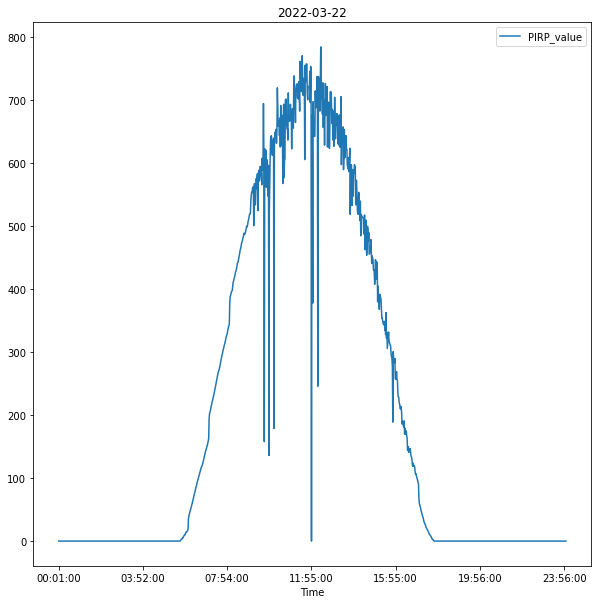

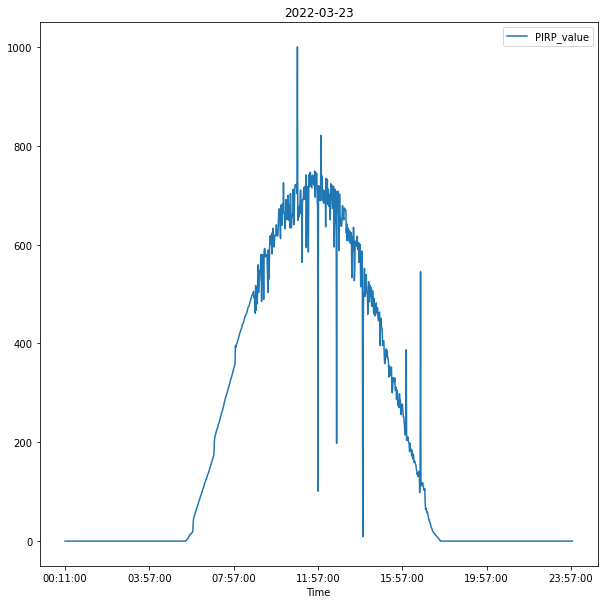

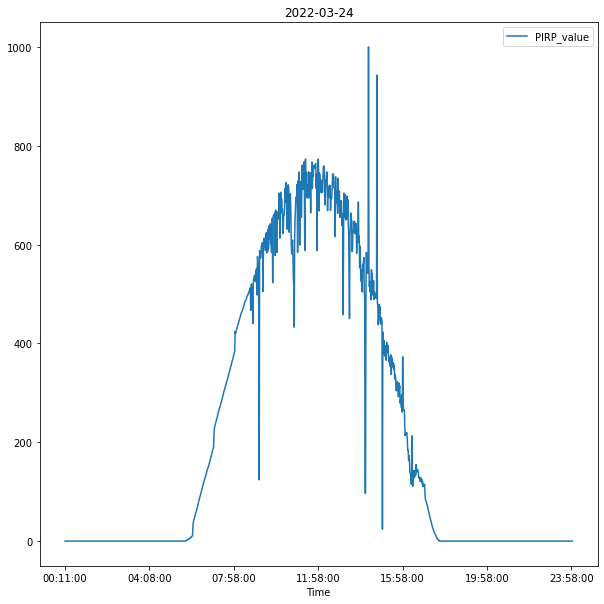

In [14]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[180:185]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


**Evolution on some summer days**

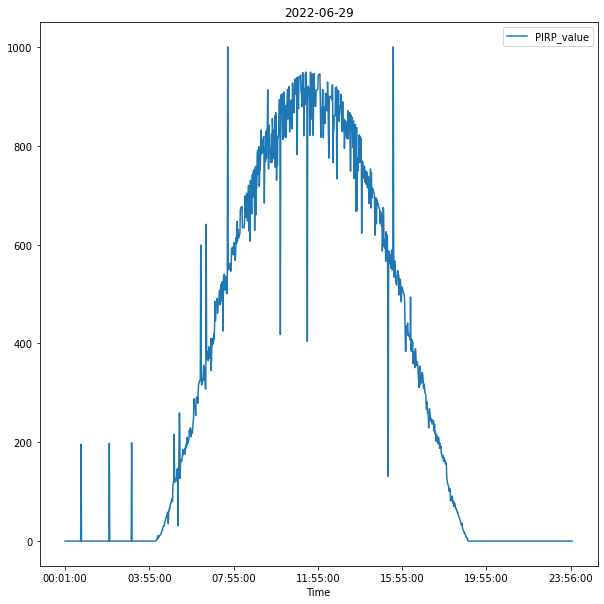

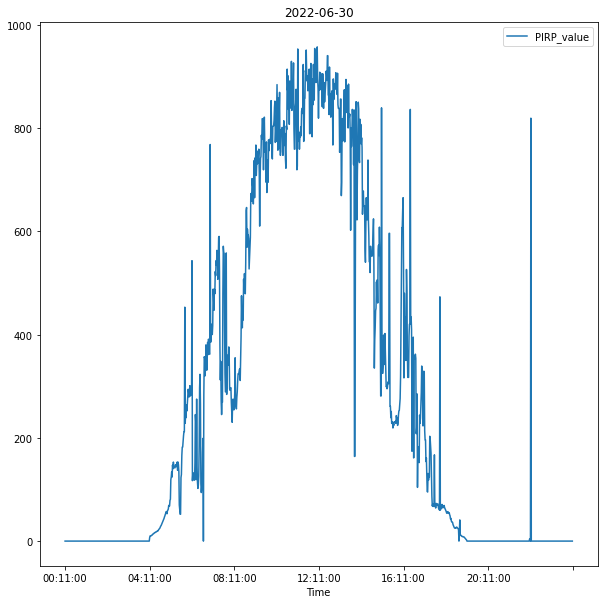

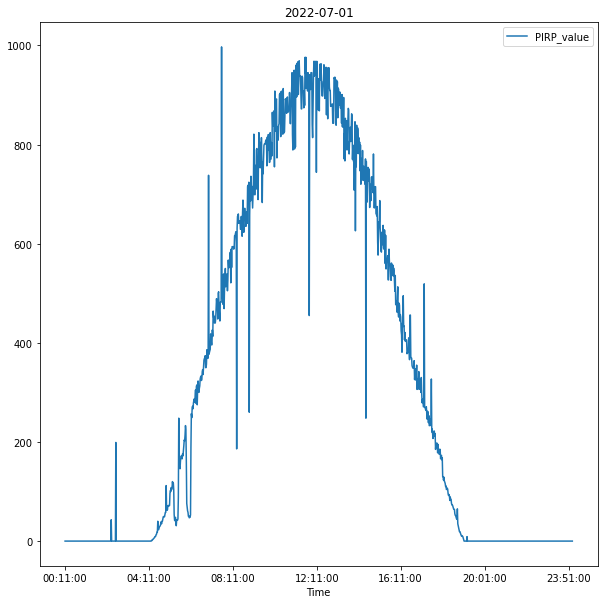

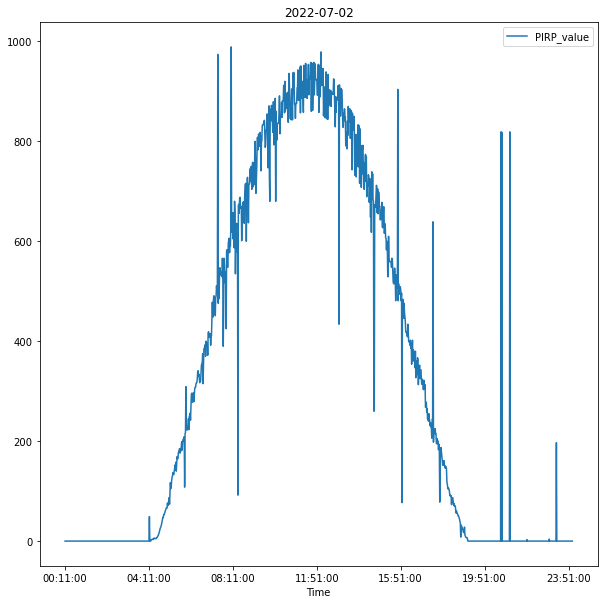

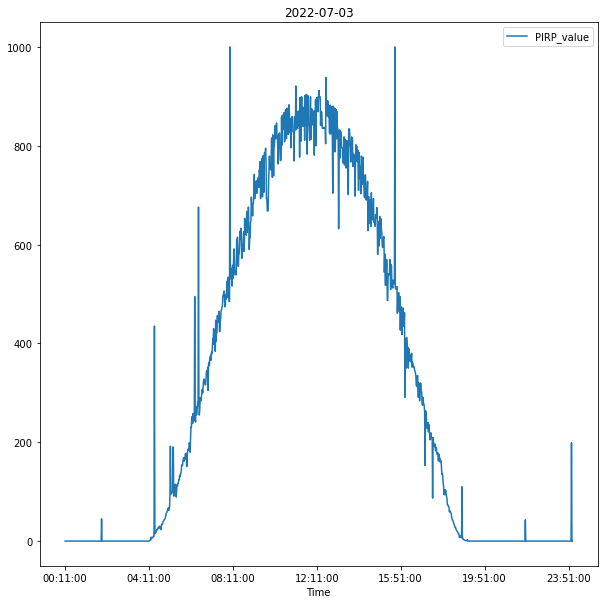

In [16]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[280:285]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


In [77]:
#The next step can be to remove the values of class 0 to 10% of the total values because those null values 
#are not interesting when training our model but i prefer to test training without doing this operation
#and after maybe try to do it and compare the results...

#Also, there is some noise in the data but i prefered to train models with them so that the model can generalize well
#and also because of lack of time...
data.head()
serie=data.groupby(["Category"]).count()
print(serie)
#print(serie["class 0"]/(serie["class 1"]+serie["class 2"]+serie["class 0"])*100)
print(data)
data.to_csv("test.csv")

          Time  PIRP_value
Category                  
class 0    535         535
class 1     71          71
class 2    595         595
          Time  PIRP_value Category
0     00:11:00           0  class 0
1     00:12:00           0  class 0
2     00:13:00           0  class 0
3     00:14:00           0  class 0
4     00:15:00           0  class 0
...        ...         ...      ...
1196  23:57:00           0  class 0
1197  23:58:00           0  class 0
1198  23:59:00           0  class 0
1199  00:00:00           0  class 0
1200  00:00:00           0  class 0

[1201 rows x 3 columns]


In [73]:
#Here i have to remain only 10 or 15% or 0 irradiance data but before that let's match the pirp value with correponding 
#images and delete the ones that doesn't have matching values.
print(116/(116+71+565)*100)
print(int(15/85*(serie["class 1"]+serie["class 2"])))

15.425531914893616
117
